In [5]:
import numpy as np
import os
import threading
import operator
import pickle
import re
import pandas as pd


from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import os
from tqdm import tqdm_notebook as tqdm
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas
import re
import os


start_time = 1190146243
end_time = 1192994591

def load_data(input_name):
    with open(input_name, 'rb') as f:
        data = pickle.load(f)
    return data
def dump_data(data, output_name):
    with open(output_name, 'wb') as f:
        pickle.dump(data, f)

In [5]:
word_freq = load_data('data/dump/hot_words_100000.pkl')

In [36]:
from urllib.parse import unquote
from urllib.parse import quote

def unquote_word(word):
    word = " ".join(unquote(unquote(word)).split("_"))
    return word

num_to_word = list(set(list(map(lambda x: unquote_word(x),list(set(word_freq.index))))))
word_to_num = {word:i  for word,i in zip(num_to_word, range(len(num_to_word)))}

In [64]:
from ipywidgets import IntProgress

links_to = []
in_degree = {}
out_degree = {}
freq = {}

for word in num_to_word:
    in_degree[word] = 0
    out_degree[word] = 0

files = [name for name in os.listdir("data/dump") if 'metadata' in name]
p = IntProgress(max = 100000)

display(p)
for file in files:
    meta = load_data("data/dump/" + file)
    for word in meta:
        unquoted = unquote_word(word)
        freq[unquoted] = word_freq[word]
        record = meta[word]
        link = record['links']
        for to_word in link:
            if to_word in word_to_num:
                in_degree[to_word] += 1
                out_degree[unquoted] += 1
                links_to.append((unquoted, to_word))
                
        p.value += 1

dump_data((links_to, in_degree, out_degree), "data/dump/link_records_in_degree_out_degree.pkl")

IntProgress(value=0, max=100000)

In [65]:
meta_df = pd.concat([pd.Series(in_degree),pd.Series(out_degree), pd.Series(freq)], axis = 1).dropna(axis=0, how='any')
meta_df = meta_df.rename(columns={0: 'in_degree', 1:'out_degree', 2:'freq'})

In [ ]:
meta_df.head()
#dump_data(meta_df, "data/dump/graph_info.pkl")

In [72]:
'''
with open("data/dump/link_info.txt", 'w') as f:
    for record in links_to:
        f.write("{} {}\n".format(word_to_num[record[0]], word_to_num[record[1]]))
with open("data/dump/word_index.txt", 'w') as f:
    for word in word_to_num:
        f.write("{} {}\n".format(word, word_to_num[word]))
'''

(0.7475740313653426, 0.0)

# Hypothesis 1: In-degrees have positive relation with visit count.  

In [18]:
def seperate_list(array, bins=10):
    arrary1 = sorted(array)
    cut = []
    delta = len(arrary1) // bins
    for j in range(0, bins):
        if len(cut) > 0 and arrary1[delta * j] == cut[-1]:
            continue
        cut.append(arrary1[delta * j])
    cut.append(arrary1[-1])
    return cut

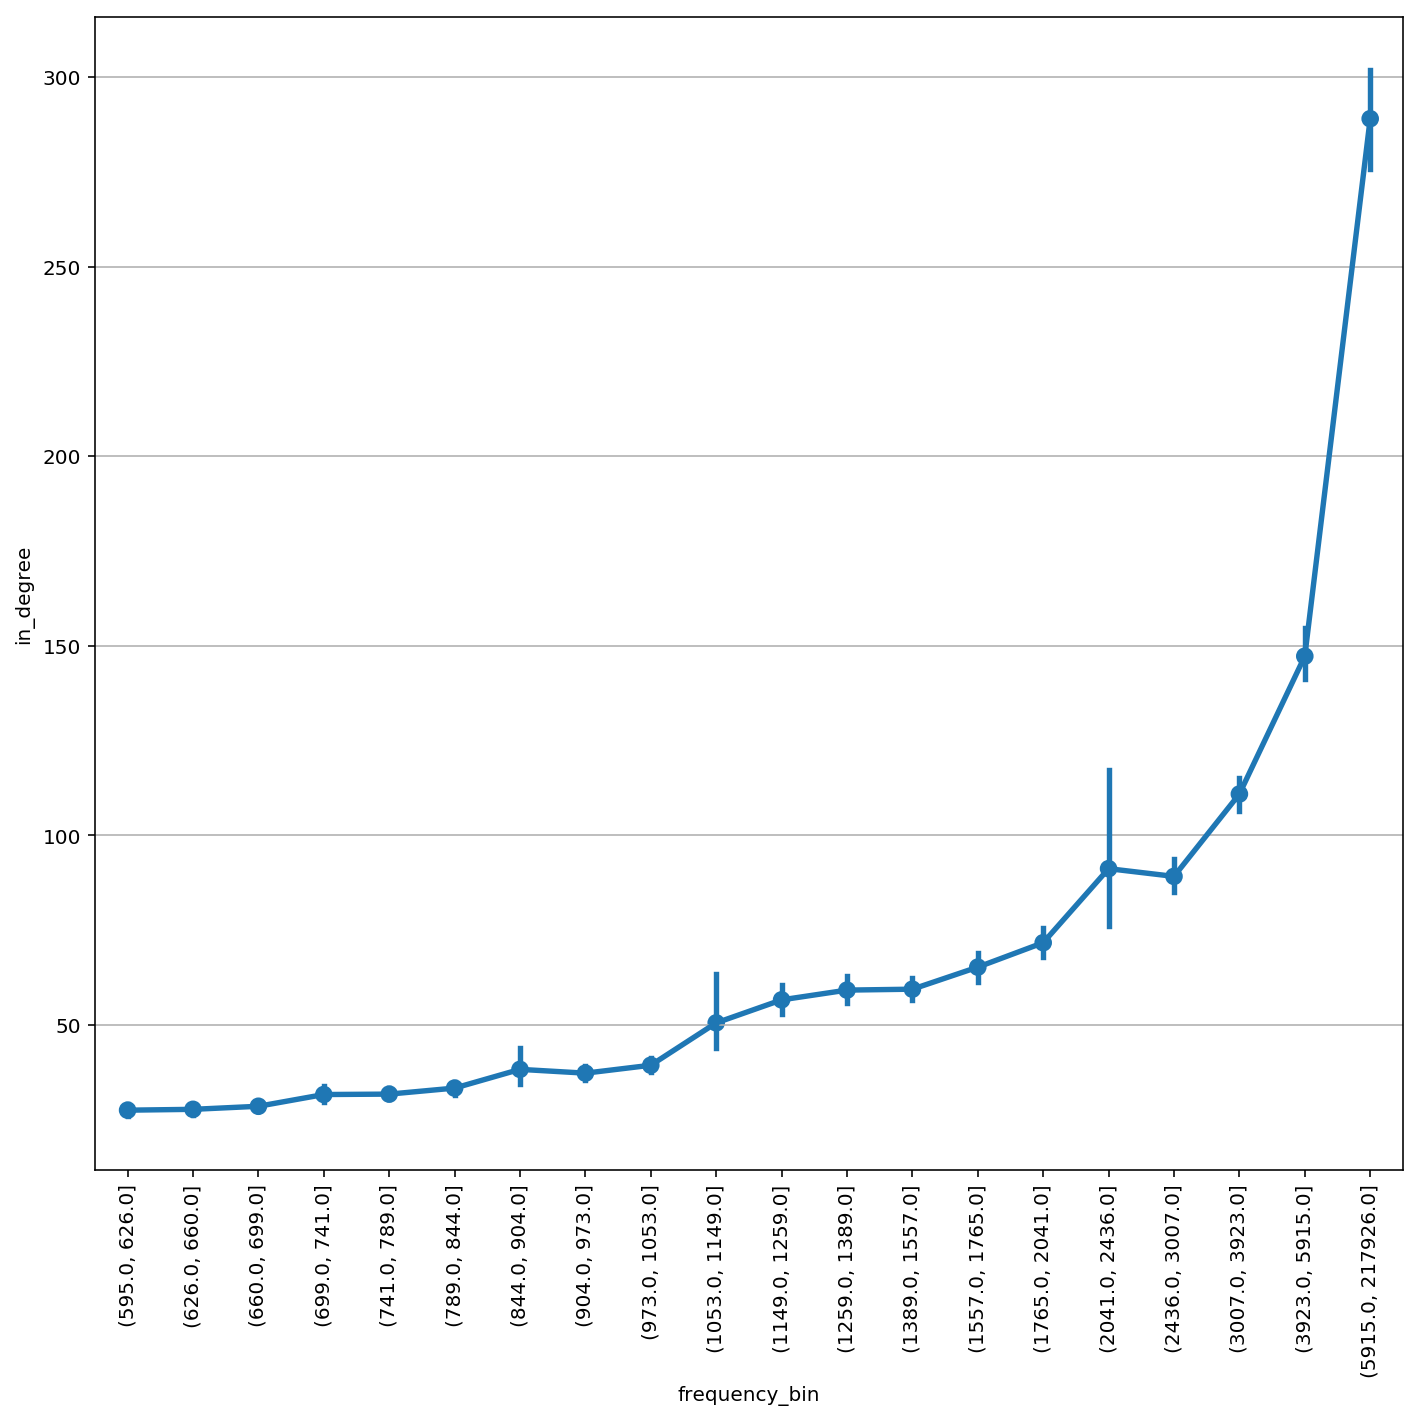

In [19]:
# load data
visit_count_df = pickle.load(open('./data/dump/merged_metadata.pkl', 'rb'))
visit_count_df.head()

# plot
column = 'in_degree'
plt.figure(figsize=(10, 10))
visit_count_df['frequency_bin'] = pandas.cut(
    visit_count_df['frequency'],
    seperate_list(visit_count_df['frequency'].values, 20))
sns.pointplot(y=visit_count_df[column], x='frequency_bin', data=visit_count_df)
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
#plt.savefig('./plots/title_frequency_%s.png'%column,dpi=400)
plt.show()

# Hypothesis 2: Out-degrees have positive relation with visit count.  

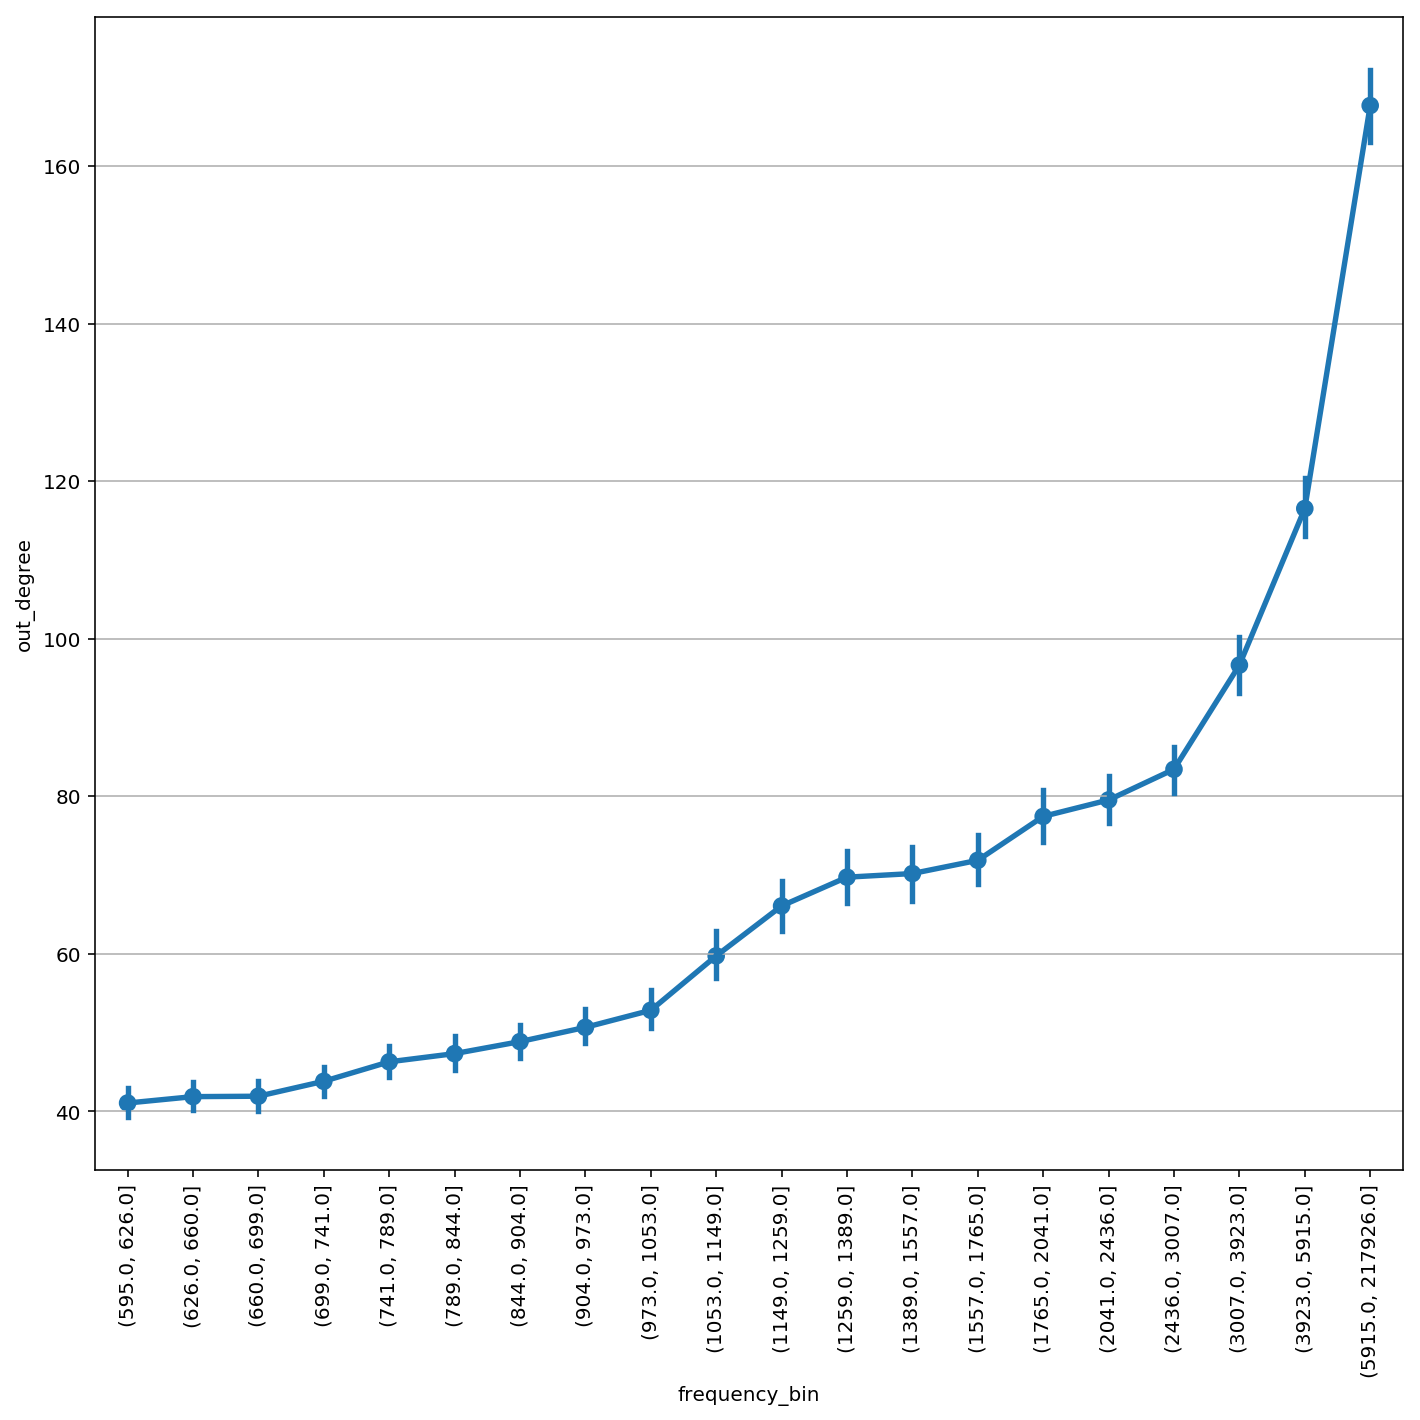

In [20]:
# load data
visit_count_df = pickle.load(open('./data/dump/merged_metadata.pkl', 'rb'))
visit_count_df.head()

# plot
column = 'out_degree'
plt.figure(figsize=(10, 10))
visit_count_df['frequency_bin'] = pandas.cut(
    visit_count_df['frequency'],
    seperate_list(visit_count_df['frequency'].values, 20))
sns.pointplot(y=visit_count_df[column], x='frequency_bin', data=visit_count_df)
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
#plt.savefig('./plots/title_frequency_%s.png'%column,dpi=400)
plt.show()

# Hypothesis 3: In-degrees and Out-degrees have positive relation with each other. 

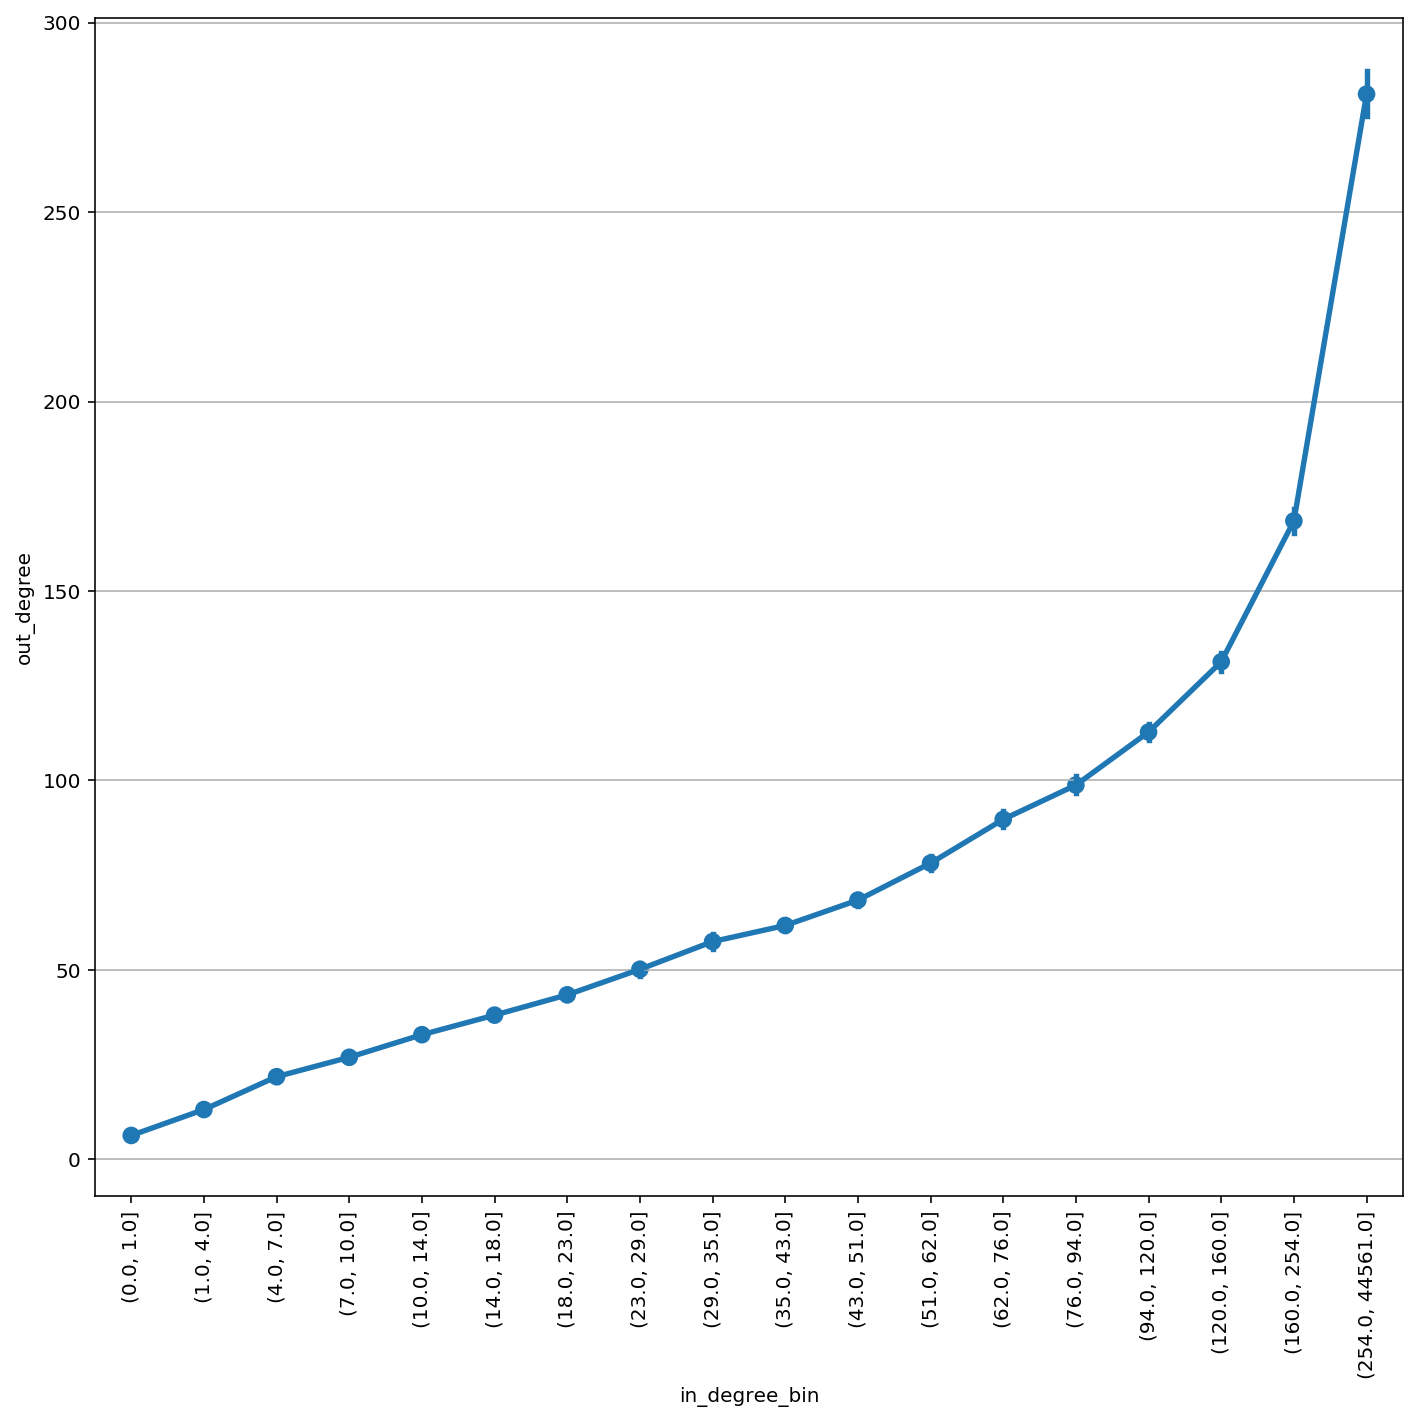

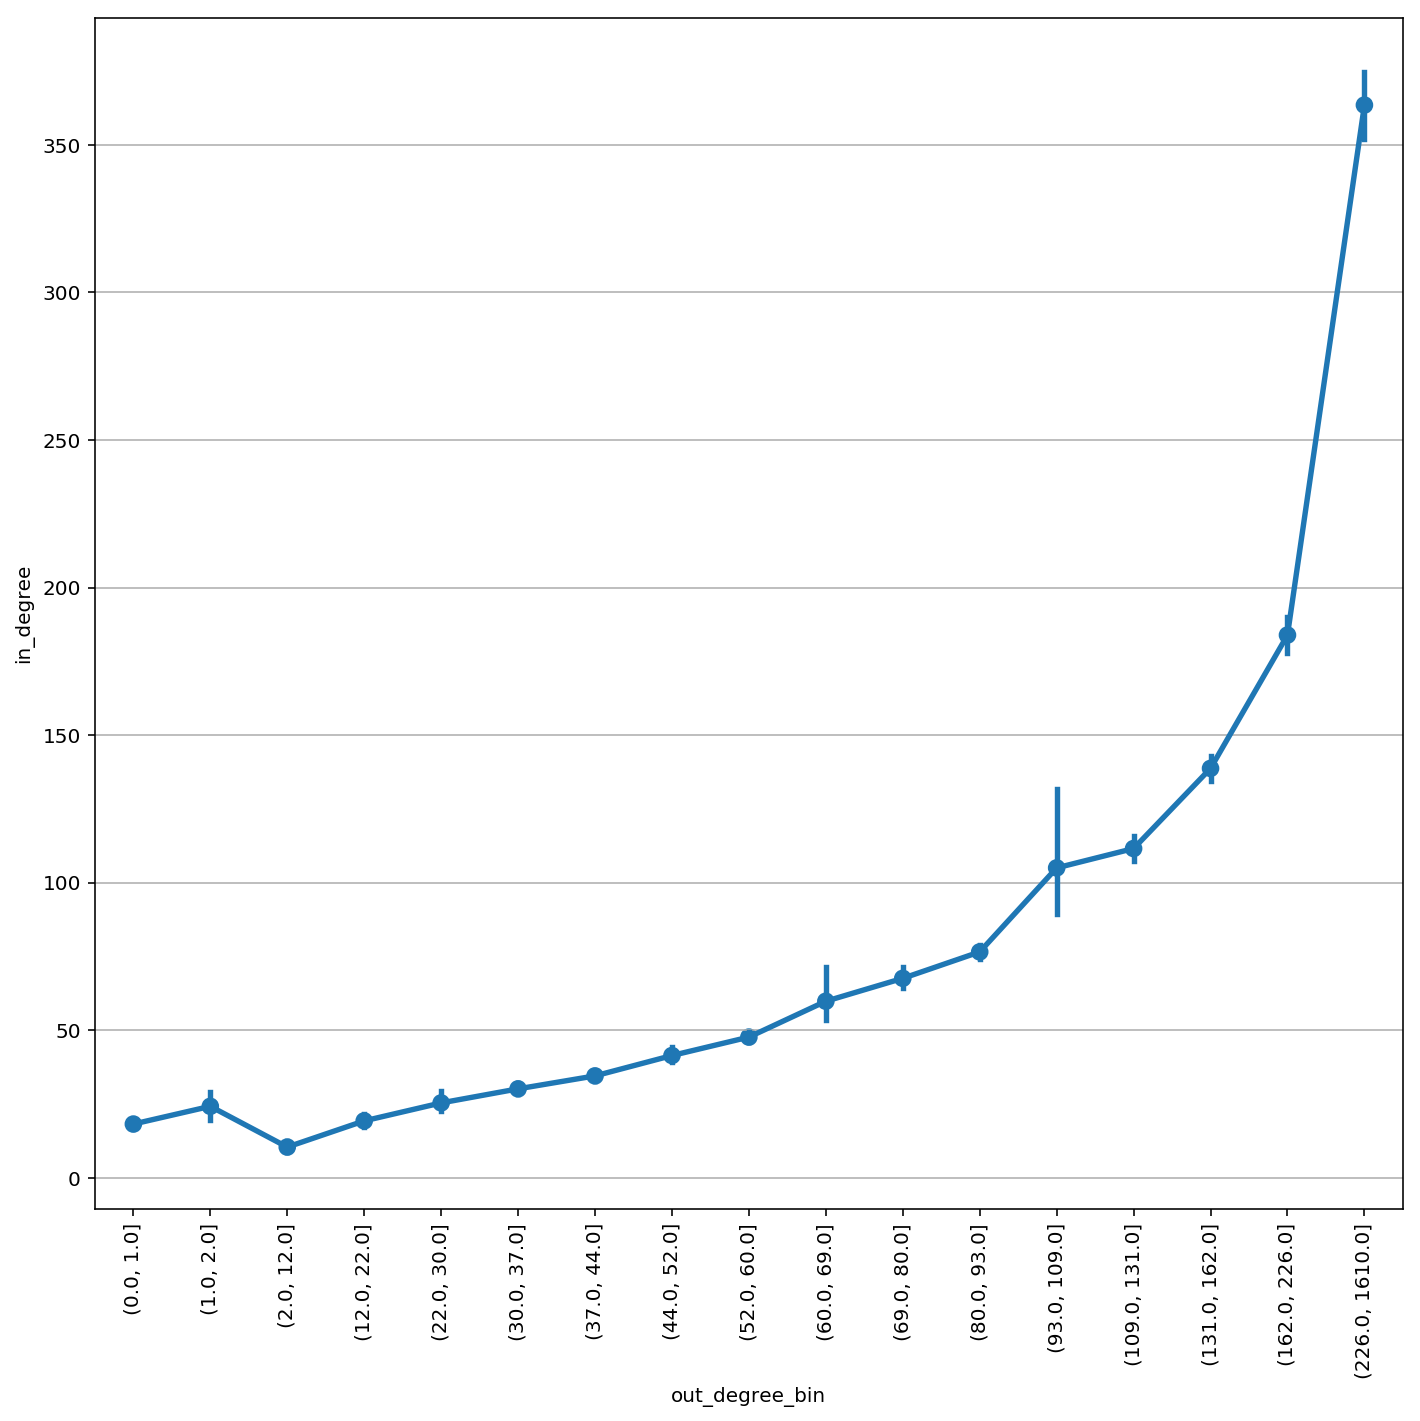

In [21]:
# load data
visit_count_df = pickle.load(open('./data/dump/merged_metadata.pkl', 'rb'))
visit_count_df.head()

# plot
column = 'out_degree'
plt.figure(figsize=(10, 10))
visit_count_df['in_degree_bin'] = pandas.cut(
    visit_count_df['in_degree'],
    seperate_list(visit_count_df['in_degree'].values, 20))
sns.pointplot(y=visit_count_df[column], x='in_degree_bin', data=visit_count_df)
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
#plt.savefig('./plots/title_frequency_%s.png'%column,dpi=400)
plt.show()

# plot
column = 'in_degree'
plt.figure(figsize=(10, 10))
visit_count_df['out_degree_bin'] = pandas.cut(
    visit_count_df['out_degree'],
    seperate_list(visit_count_df['out_degree'].values, 20))
sns.pointplot(y=visit_count_df[column], x='out_degree_bin', data=visit_count_df)
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.tight_layout()
#plt.savefig('./plots/title_frequency_%s.png'%column,dpi=400)
plt.show()

### Pearson recorrelation test between in-dgree and out-degree

In [83]:
from pydoc import help
from scipy.stats.stats import pearsonr
import numpy as np
import pickle
visit_count_df = pickle.load(open('./data/dump/merged_metadata.pkl', 'rb'))
pearsonr(np.log(visit_count_df['in_degree'] + 1),np.log(visit_count_df['out_degree'] +1))

(0.7475740313653426, 0.0)